Shapes: (288, 384) (288, 384)


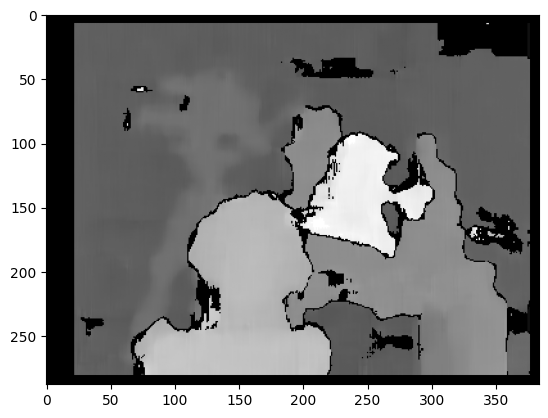

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

# Load images
imgL = cv.imread('DisparityMapfromStereoPair-master/tsukuba_l.png', cv.IMREAD_GRAYSCALE)
imgR = cv.imread('DisparityMapfromStereoPair-master/tsukuba_r.png', cv.IMREAD_GRAYSCALE)

# Check loading
if imgL is None or imgR is None:
    raise ValueError("One or both images not loaded. Check file paths!")

# Check shape
print("Shapes:", imgL.shape, imgR.shape)
if imgL.shape != imgR.shape:
    imgR = cv.resize(imgR, (imgL.shape[1], imgL.shape[0]))

# Stereo BM
stereo = cv.StereoBM.create(numDisparities=16, blockSize=15)
# numDisparities : Must be > 0 and multiple of 16 (OpenCV requirement).
# blockSize : Must be odd, between 5 and 255, and not larger than image width/height.
disparity = stereo.compute(imgL, imgR)
# result is typically CV_16S (signed 16-bit) and disparities are scaled by 16 (i.e. fixed-point with 4 fractional bits).
# So the real disparity in pixels = disparity.astype(np.float32) / 16.0.

# Normalize for display
disp_vis = cv.normalize(disparity, None, 0, 255, cv.NORM_MINMAX, cv.CV_8U)

plt.imshow(disp_vis, cmap='gray')
plt.show()
